# JupyterLab Extension Updates

This notebook does a historic plot of the number of extensions published to NPM with the "jupyterlab-extension" keyword, and which versions of JupyterLab they support.

In [1]:
%matplotlib inline

In [5]:
import datetime
import io
import json
import os
import pandas as pd
from pprint import pprint

In [6]:
# Rad the raw data:
raw_data = {}
dirname = './profile'
for f in os.listdir(dirname):
    with io.open(os.path.join(dirname, f), encoding='utf8') as fp:
        raw_data[os.path.splitext(f)[0]] = json.load(fp)

In [55]:
# Parse out data about what the latest version of lab extensions support:
data_labsupport = []
for datestr, profile in raw_data.items():
    summary = profile['summary']
    row = {
        'Date': datetime.date.fromisoformat(datestr),
        'Unclassified': len(summary['unclassified'])
    }
    for major_ver, count in summary['labSupportCounts'].items():
        if major_ver != 'unclassified':
            row[f'v{major_ver}.x'] = count
    data_labsupport.append(row)

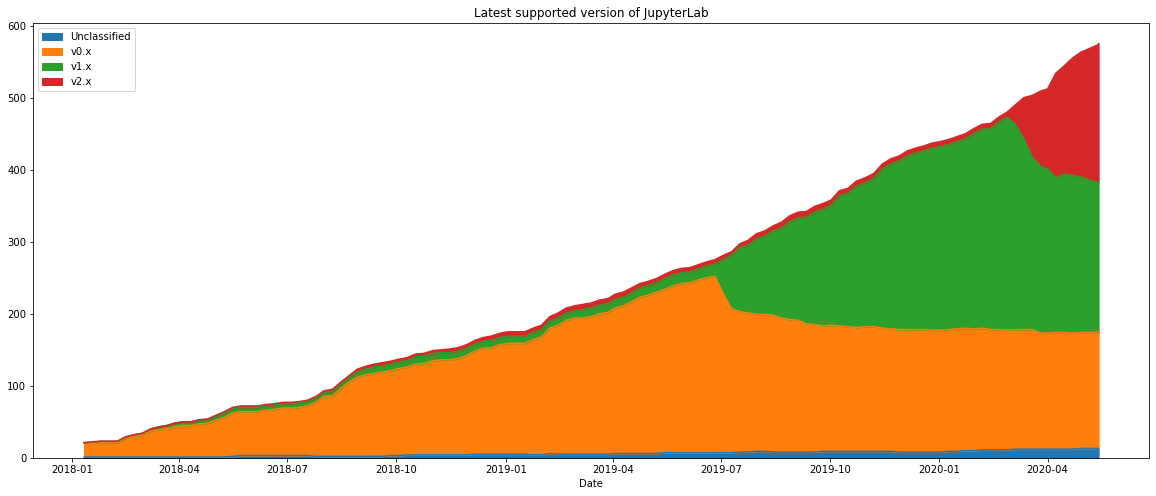

In [56]:
by_version = pd.DataFrame(data_labsupport)
by_version.plot.area(x='Date', figsize=(20, 8), title='Latest supported version of JupyterLab')

In [46]:
# Parse out data about how many extensions support the latest lab version vs are outdated:
data_latest = []
latest_keys = {}
for datestr, profile in raw_data.items():
    summary = profile['summary']
    row = {
        'Date': datetime.date.fromisoformat(datestr),
        'Up to date': summary['uptodateCount'],
        'Unclassified': len(summary['unclassified']),
    }
    for major_ver, count in summary['outdatedCountCategorized'].items():
        if major_ver != 'unclassified':
            row[f'Outdated: v{major_ver}.x'] = count
    data_latest.append(row)
    latest_keys.update({k: None for k in row.keys()})

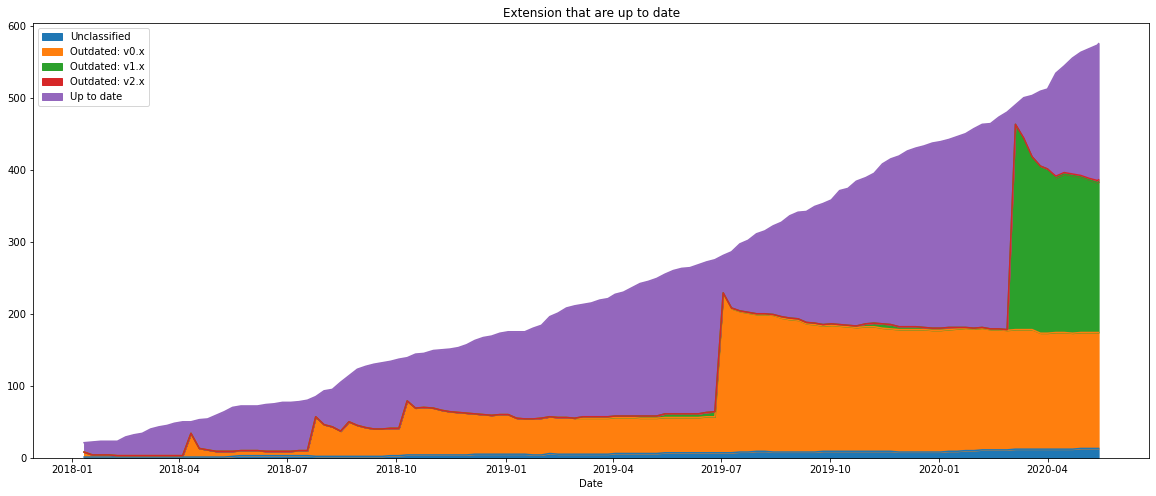

In [57]:
latest_support = pd.DataFrame(data_latest)
# Sort 'Up to date' column last
y = list(filter(lambda k: k not in ('Up to date', 'Date'), latest_keys.keys())) + ['Up to date']
latest_support.plot.area(x='Date', y=y, figsize=(20, 8), title='Extension that are up to date')